In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('bbc_news.csv')
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [3]:
df.drop(columns=['pubDate','guid','link'],inplace = True)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42115 entries, 0 to 42114
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42115 non-null  object
 1   description  42115 non-null  object
dtypes: object(2)
memory usage: 658.2+ KB


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def text_preprocessing(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    text = re.sub(r'\d+','',text)

    tokens = word_tokenize(text)
    tokens_tmp = []
    for i in tokens:
        if i not in stop_words:
            tokens_tmp.append(lemmatizer.lemmatize(i))
    tokens = tokens_tmp
    return " ".join(tokens)
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df['title'] = df['title'].apply(text_preprocessing)
df['description'] = df['description'].apply(text_preprocessing)

,title,description
0,ukraine angry zelensky vow punish russian atro...,ukrainian president say country forgive forget...
1,war ukraine taking cover town attack,jeremy bowen frontline irpin resident came rus...
2,ukraine war catastrophic global food,one world biggest fertiliser firm say conflict...
3,manchester arena bombing saffie roussoss paren...,parent manchester arena bombing youngest victi...
4,ukraine conflict oil price soar highest level ...,consumer feeling impact higher energy cost fue...


In [8]:
df

,title,description
0,ukraine angry zelensky vow punish russian atro...,ukrainian president say country forgive forget...
1,war ukraine taking cover town attack,jeremy bowen frontline irpin resident came rus...
2,ukraine war catastrophic global food,one world biggest fertiliser firm say conflict...
3,manchester arena bombing saffie roussoss paren...,parent manchester arena bombing youngest victi...
4,ukraine conflict oil price soar highest level ...,consumer feeling impact higher energy cost fue...
...,...,...
42110,highlight wale make history dublin,watch highlight wale win dublin aggregate triu...
42111,gang jailed £m cocaine banana box,two tonne class drug seized shipment colombia uk
42112,scottish budget present huge challenge snp,finance secretary shona robison preparing set ...
42113,celebration wale make history qualifying euro,wale defeated republic ireland making football...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
df['document'] = df['title'] + " " + df['description']
vectorizer = CountVectorizer(max_features=25000)
data = vectorizer.fit_transform(df['document'])

In [10]:
print(data.shape)  

print(vectorizer.get_feature_names_out()[:20])  

print(data[0].toarray())  

(42115, 25000)
['aa' 'aaa' 'aaliyah' 'aamir' 'aanoch' 'aap' 'aardman' 'aaron'
 'aaronovitch' 'aarwangen' 'aastha' 'ab' 'abandon' 'abandoned'
 'abandoning' 'abasan' 'abatement' 'abating' 'abattoir' 'abaya']
[[0 0 0 ... 0 0 0]]


In [19]:
from sklearn.decomposition import LatentDirichletAllocation 
lda = LatentDirichletAllocation(n_components = 5, random_state = 42)
lda.fit(data)

LatentDirichletAllocation(n_components=5, random_state=42)

In [25]:
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        top_indices = topic.argsort()[-top_n:]  # indices of top words
        top_words = [words[i] for i in top_indices]
        print("  " + ", ".join(top_words))

print_topics(lda, vectorizer, top_n=10)

Topic 1:
  energy, attack, israel, gaza, people, russian, russia, say, war, ukraine
Topic 2:
  died, year, murder, found, two, death, say, woman, man, police
Topic 3:
  beat, city, say, final, manchester, league, win, cup, world, england
Topic 4:
  labour, party, bbc, people, minister, government, new, election, uk, say
Topic 5:
  uk, paper, bbc, rate, new, show, king, star, year, say


In [21]:
def get_topic_distribution(model, data, doc_id=None):
    topic_dist = model.transform(data)
    
    if doc_id is not None:
        print(f"Document {doc_id} topic distribution:")
        for topic_idx, prob in enumerate(topic_dist[doc_id]):
            print(f"  Topic {topic_idx}: {prob:.4f}")
    else:
        return topic_dist
topic_matrix = get_topic_distribution(lda, data)
print(topic_matrix)

[[0.8822844  0.07992697 0.0125674  0.01267581 0.01254542]
 [0.95255191 0.01187201 0.01180555 0.01191066 0.01185987]
 [0.9548113  0.01119343 0.01140432 0.01132371 0.01126724]
 ...
 [0.0119548  0.01182393 0.01187814 0.95244317 0.01189996]
 [0.01190198 0.01182559 0.95240048 0.01188897 0.01198298]
 [0.31260657 0.65123292 0.0118416  0.01216494 0.01215397]]


In [26]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=25000)
data_nmf = vectorizer_tfidf.fit_transform(df['document'])

In [28]:
NMF = NMF(n_components=5,random_state=42)
w = NMF.fit_transform(data_nmf)
h = NMF.components_

In [30]:
def print_nmf_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-top_n - 1:-1] 
        top_words = [words[i] for i in top_features_idx]
        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

print_nmf_topics(NMF, vectorizer_tfidf, top_n=10)

Topic 1: rate, price, uk, cost, rising, energy, bill, living, inflation, interest
Topic 2: cup, world, england, win, final, womens, league, beat, first, watch
Topic 3: ukraine, war, russia, russian, ukrainian, putin, invasion, president, kyiv, say
Topic 4: say, police, people, strike, woman, israel, gaza, attack, man, two
Topic 5: election, party, minister, labour, sunak, tory, paper, pm, rishi, vote


In [32]:
def print_nmf_doc_topics(W, n_docs=5):
    for i in range(n_docs):
        print(f"Document {i+1} → Topic distribution: {W[i]}")

print_nmf_doc_topics(w, n_docs=5)

Document 1 → Topic distribution: [0.         0.         0.0759041  0.01355331 0.00302267]
Document 2 → Topic distribution: [0.         0.         0.08243757 0.01220013 0.        ]
Document 3 → Topic distribution: [0.01236462 0.02100389 0.06174249 0.0120398  0.        ]
Document 4 → Topic distribution: [0.         0.00580268 0.         0.02529002 0.        ]
Document 5 → Topic distribution: [0.0794448  0.         0.03252364 0.         0.        ]


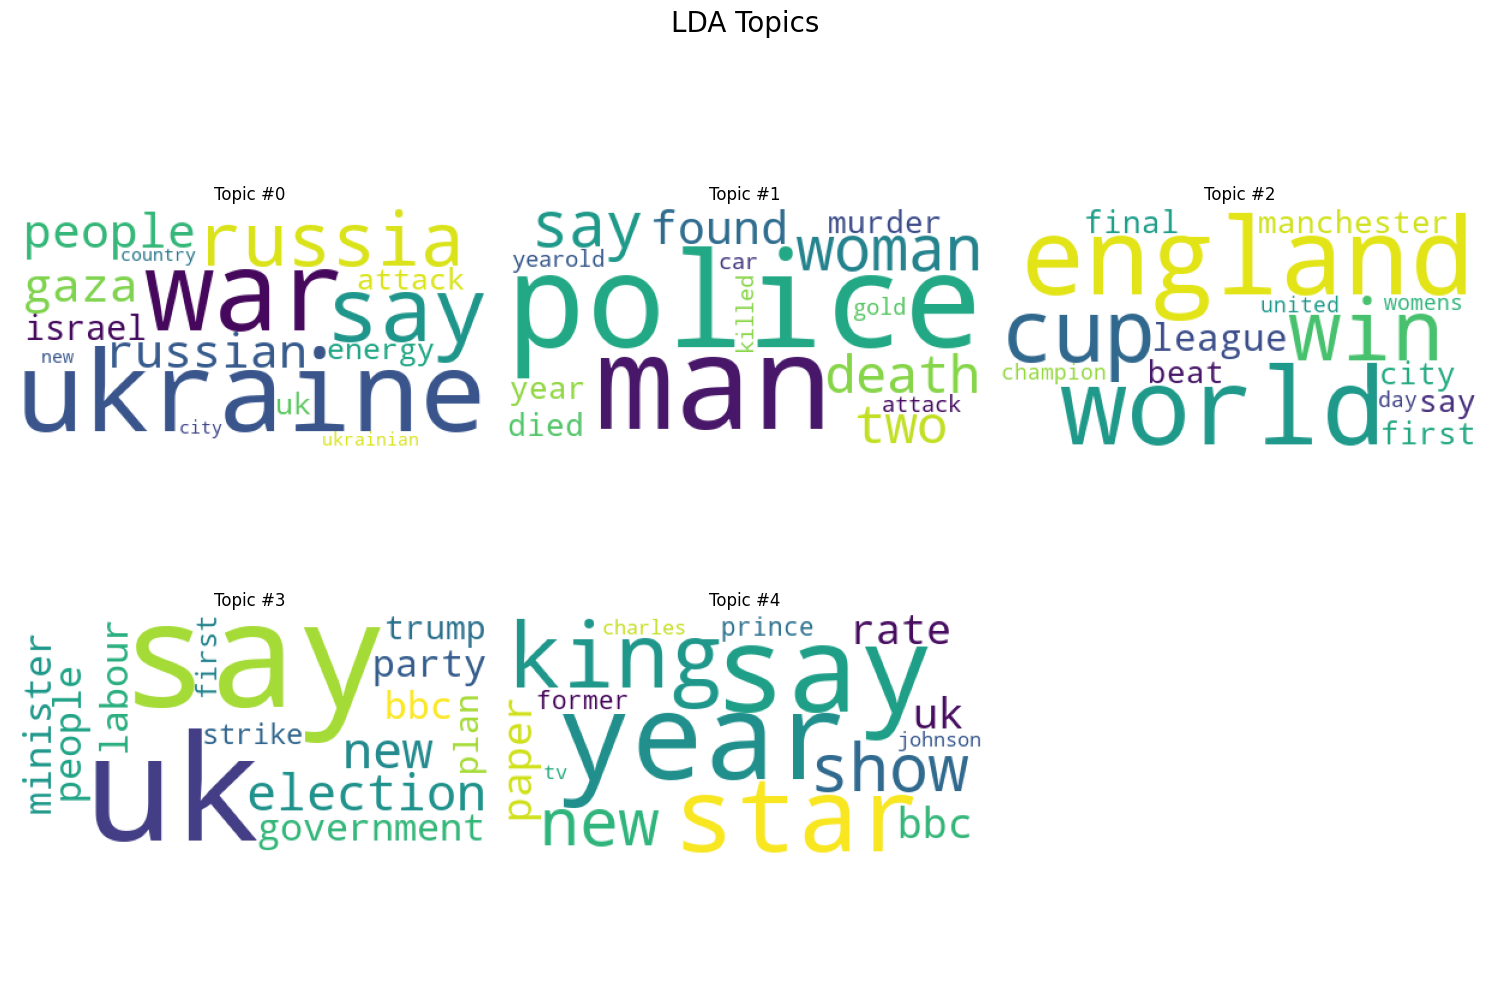

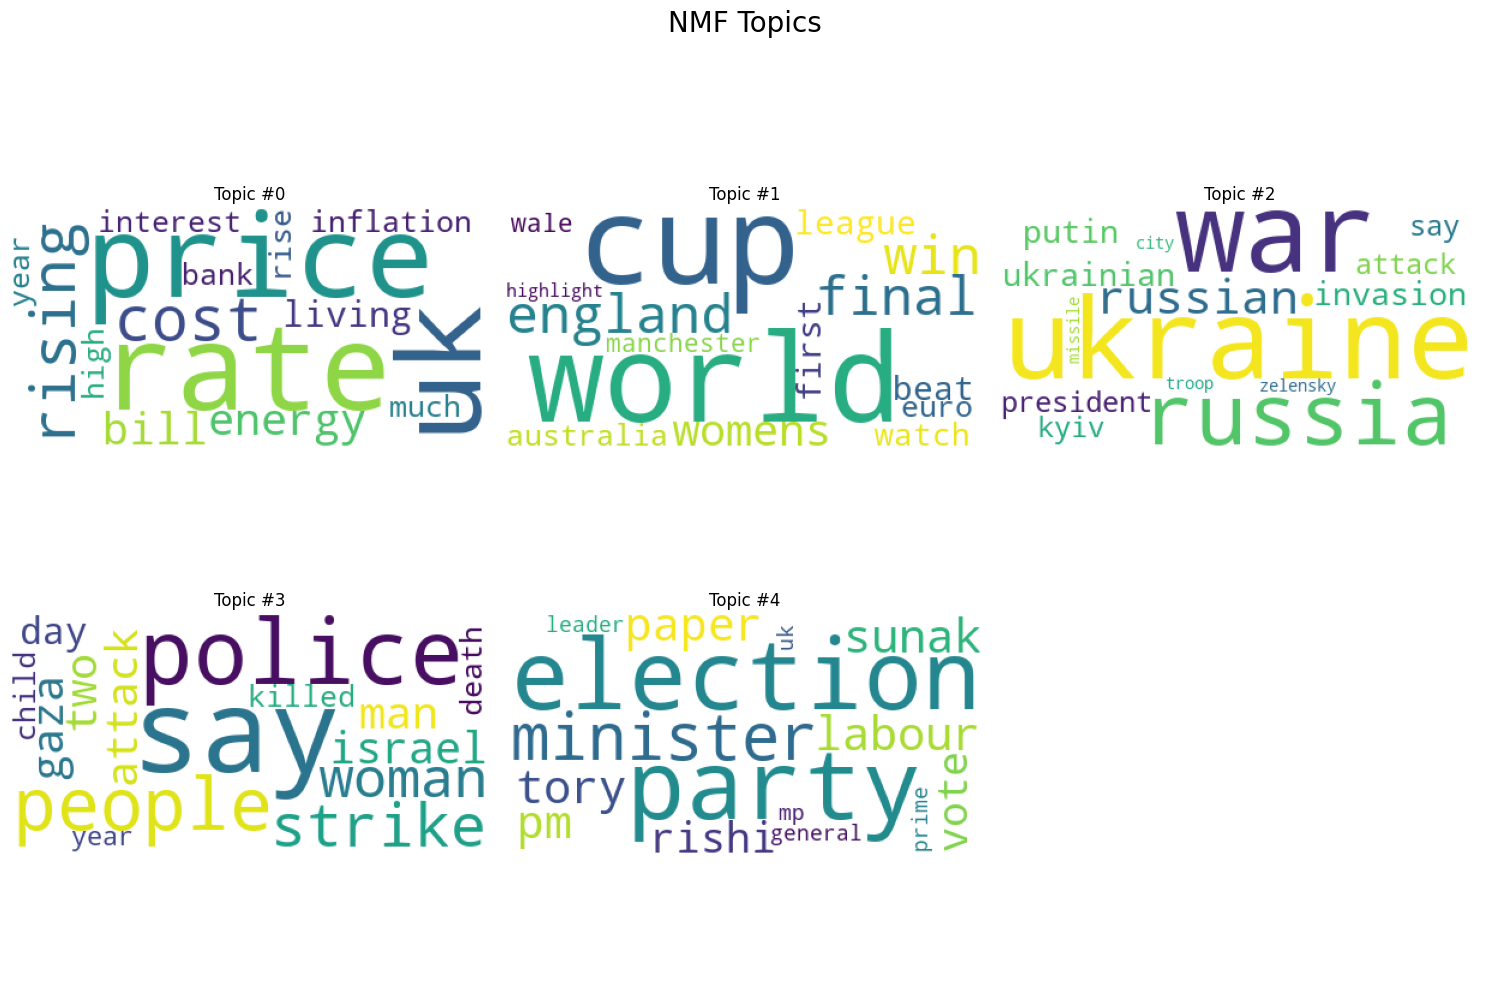

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds_single(model, feature_names, model_name, n_top_words=15):
    n_topics = model.components_.shape[0] 
    n_cols = 3 
    n_rows = (n_topics + n_cols - 1) // n_cols 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(background_color='white').generate(
            ' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        )
        axes[topic_idx].imshow(wordcloud)
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic #{topic_idx}")

    for j in range(topic_idx + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"{model_name} Topics", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_wordclouds_single(lda, vectorizer.get_feature_names_out(), "LDA")
plot_wordclouds_single(NMF, vectorizer_tfidf.get_feature_names_out(), "NMF")
